# **Tarea Nº 2**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Sábado 6 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Elías Gómez y Gustavo Torres ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

## Filtering rows

1. Import the `flights.csv` dataset. Find all flights that:

    a. Had an arrival delay of three or more hours
    b. Flew to Houston (IAH or HOU)
    c. Were operated by United, American, or Southwest
    d. Departed in spring (March, April, and June)
    e. Arrived more than two hours late, but didn’t leave late
    f. Were delayed by at least an hour, but made up over 30 minutes in flight 7. Departed between midnight and 5am (inclusive)

In [26]:
# Solution
import pandas as pd
import numpy as np

flights = pd.read_csv('flights.csv') 
flights= flights.drop(flights.columns[0], axis=1) #eliminar la primera columna 'Unnamed'
#hacer que solo aparezcan los primeros 5 registros
# a. Had an arrival delay of three or more hours
delayed_flights = flights.loc[(flights['arr_delay'] >= 180)]
delayed_flights 


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
649,2013,1,1,1815.0,1325,290.0,2120.0,1542,338.0,EV,4417,N17185,EWR,OMA,213.0,1134,13,25,2013-01-01 13:00:00
673,2013,1,1,1842.0,1422,260.0,1958.0,1535,263.0,EV,4633,N18120,EWR,BTV,46.0,266,14,22,2013-01-01 14:00:00
746,2013,1,1,2006.0,1630,216.0,2230.0,1848,222.0,EV,4644,N14972,EWR,SAV,121.0,708,16,30,2013-01-01 16:00:00
801,2013,1,1,2115.0,1700,255.0,2330.0,1920,250.0,9E,3347,N924XJ,JFK,CVG,115.0,589,17,0,2013-01-01 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335540,2013,9,29,1745.0,1330,255.0,2028.0,1632,236.0,B6,431,N517JB,LGA,SRQ,137.0,1047,13,30,2013-09-29 13:00:00
335720,2013,9,29,2049.0,1730,199.0,2153.0,1852,181.0,B6,86,N373JB,JFK,ROC,44.0,264,17,30,2013-09-29 17:00:00
335778,2013,9,29,2327.0,1942,225.0,153.0,2250,183.0,B6,1271,N659JB,LGA,FLL,129.0,1076,19,42,2013-09-29 19:00:00
336252,2013,9,30,1324.0,830,294.0,1512.0,1040,272.0,EV,5157,N761ND,LGA,CLT,79.0,544,8,30,2013-09-30 08:00:00


In [17]:
# b. Flew to Houston (IAH or HOU)
houston_flights = flights.loc[(flights['dest'] == 'IAH') | (flights['dest'] == 'HOU')]
houston_flights 

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
32,33,2013,1,1,623.0,627,-4.0,933.0,932,1.0,UA,496,N459UA,LGA,IAH,229.0,1416,6,27,2013-01-01 06:00:00
81,82,2013,1,1,728.0,732,-4.0,1041.0,1038,3.0,UA,473,N488UA,LGA,IAH,238.0,1416,7,32,2013-01-01 07:00:00
89,90,2013,1,1,739.0,739,0.0,1104.0,1038,26.0,UA,1479,N37408,EWR,IAH,249.0,1400,7,39,2013-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336524,336525,2013,9,30,1729.0,1720,9.0,2001.0,2010,-9.0,UA,652,N455UA,EWR,IAH,173.0,1400,17,20,2013-09-30 17:00:00
336527,336528,2013,9,30,1735.0,1715,20.0,2010.0,2005,5.0,WN,2067,N296WN,EWR,HOU,188.0,1411,17,15,2013-09-30 17:00:00
336618,336619,2013,9,30,1859.0,1859,0.0,2134.0,2159,-25.0,UA,1128,N14731,LGA,IAH,180.0,1416,18,59,2013-09-30 18:00:00
336694,336695,2013,9,30,2015.0,2015,0.0,2244.0,2307,-23.0,UA,1545,N17730,EWR,IAH,174.0,1400,20,15,2013-09-30 20:00:00


In [18]:
# c. Were operated by United, American, or Southwest
airline_flights = flights.loc[(flights['carrier'] == 'UA') | (flights['carrier'] == 'AA') | (flights['carrier'] == 'WN')]
airline_flights

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
5,6,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
9,10,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336736,336737,2013,9,30,2104.0,2030,34.0,2205.0,2150,15.0,WN,382,N7741C,LGA,MDW,105.0,725,20,30,2013-09-30 20:00:00
336737,336738,2013,9,30,2105.0,2106,-1.0,2329.0,2354,-25.0,UA,475,N477UA,EWR,IAH,175.0,1400,21,6,2013-09-30 21:00:00
336751,336752,2013,9,30,2140.0,2140,0.0,10.0,40,-30.0,AA,185,N335AA,JFK,LAX,298.0,2475,21,40,2013-09-30 21:00:00
336755,336756,2013,9,30,2149.0,2156,-7.0,2245.0,2308,-23.0,UA,523,N813UA,EWR,BOS,37.0,200,21,56,2013-09-30 21:00:00


In [19]:
# d. Departed in spring (March, April, and June)
spring_flights = flights.loc[(flights['month'] == 3) | (flights['month'] == 4) | (flights['month'] == 6)]
spring_flights

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
136247,136248,2013,3,1,4.0,2159,125.0,318.0,56,142.0,B6,11,N706JB,JFK,FLL,166.0,1069,21,59,2013-03-01 21:00:00
136248,136249,2013,3,1,50.0,2358,52.0,526.0,438,48.0,B6,707,N794JB,JFK,SJU,198.0,1598,23,58,2013-03-01 23:00:00
136249,136250,2013,3,1,117.0,2245,152.0,223.0,2354,149.0,B6,608,N328JB,JFK,PWM,48.0,273,22,45,2013-03-01 22:00:00
136250,136251,2013,3,1,454.0,500,-6.0,633.0,648,-15.0,US,1117,N177US,EWR,CLT,79.0,529,5,0,2013-03-01 05:00:00
136251,136252,2013,3,1,505.0,515,-10.0,746.0,810,-24.0,UA,475,N527UA,EWR,IAH,199.0,1400,5,15,2013-03-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250445,250446,2013,6,30,NaN,1945,NaN,NaN,2104,NaN,EV,5714,N836AS,JFK,IAD,NaN,228,19,45,2013-06-30 19:00:00
250446,250447,2013,6,30,NaN,1610,NaN,NaN,1805,NaN,EV,4092,N16147,EWR,DAY,NaN,533,16,10,2013-06-30 16:00:00
250447,250448,2013,6,30,NaN,1709,NaN,NaN,1856,NaN,EV,4662,N16911,EWR,RDU,NaN,416,17,9,2013-06-30 17:00:00
250448,250449,2013,6,30,NaN,2059,NaN,NaN,2307,NaN,EV,5254,N760EV,LGA,DSM,NaN,1031,20,59,2013-06-30 20:00:00


In [20]:
# e. Arrived more than two hours late, but didn’t leave late
late_arrival_flights = flights.loc[(flights['arr_delay'] > 120) & (flights['dep_delay'] <= 0)]
late_arrival_flights 

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
22911,22912,2013,1,27,1419.0,1420,-1.0,1754.0,1550,124.0,MQ,3728,N1EAMQ,EWR,ORD,135.0,719,14,20,2013-01-27 14:00:00
33011,33012,2013,10,7,1350.0,1350,0.0,1736.0,1526,130.0,EV,5181,N611QX,LGA,MSN,117.0,812,13,50,2013-10-07 13:00:00
33019,33020,2013,10,7,1357.0,1359,-2.0,1858.0,1654,124.0,AA,1151,N3CMAA,LGA,DFW,192.0,1389,13,59,2013-10-07 13:00:00
41075,41076,2013,10,16,657.0,700,-3.0,1258.0,1056,122.0,B6,3,N703JB,JFK,SJU,225.0,1598,7,0,2013-10-16 07:00:00
55985,55986,2013,11,1,658.0,700,-2.0,1329.0,1015,194.0,VX,399,N629VA,JFK,LAX,336.0,2475,7,0,2013-11-01 07:00:00
152766,152767,2013,3,18,1844.0,1847,-3.0,39.0,2219,140.0,UA,389,N560UA,JFK,SFO,386.0,2586,18,47,2013-03-18 18:00:00
180893,180894,2013,4,17,1635.0,1640,-5.0,2049.0,1845,124.0,MQ,4540,N721MQ,LGA,DTW,130.0,502,16,40,2013-04-17 16:00:00
181270,181271,2013,4,18,558.0,600,-2.0,1149.0,850,179.0,AA,707,N3EXAA,LGA,DFW,234.0,1389,6,0,2013-04-18 06:00:00
181327,181328,2013,4,18,655.0,700,-5.0,1213.0,950,143.0,AA,2083,N565AA,EWR,DFW,230.0,1372,7,0,2013-04-18 07:00:00
213693,213694,2013,5,22,1827.0,1830,-3.0,2217.0,2010,127.0,MQ,4674,N518MQ,LGA,CLE,90.0,419,18,30,2013-05-22 18:00:00


In [21]:
# f. Were delayed by at least an hour, but made up over 30 minutes in flight?
delayed_flights_30 = flights.loc[(flights['dep_delay'] >= 60) & (flights['arr_delay'] <= -30)]
delayed_flights

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour


In [22]:
# 7. Departed between midnight and 5am (inclusive)
midnight_flights = flights.loc[(flights['dep_time'] >= 0) & (flights['dep_time'] <= 500)]
midnight_flights

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
842,843,2013,1,2,42.0,2359,43.0,518.0,442,36.0,B6,707,N580JB,JFK,SJU,189.0,1598,23,59,2013-01-02 23:00:00
843,844,2013,1,2,126.0,2250,156.0,233.0,2359,154.0,B6,22,N636JB,JFK,SYR,49.0,209,22,50,2013-01-02 22:00:00
844,845,2013,1,2,458.0,500,-2.0,703.0,650,13.0,US,1030,N162UW,EWR,CLT,108.0,529,5,0,2013-01-02 05:00:00
1785,1786,2013,1,3,32.0,2359,33.0,504.0,442,22.0,B6,707,N763JB,JFK,SJU,193.0,1598,23,59,2013-01-03 23:00:00
1786,1787,2013,1,3,50.0,2145,185.0,203.0,2311,172.0,B6,104,N329JB,JFK,BUF,58.0,301,21,45,2013-01-03 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331219,331220,2013,9,25,451.0,500,-9.0,636.0,648,-12.0,US,1877,N151UW,EWR,CLT,84.0,529,5,0,2013-09-25 05:00:00
332195,332196,2013,9,26,451.0,500,-9.0,619.0,648,-29.0,US,1877,N155UW,EWR,CLT,72.0,529,5,0,2013-09-26 05:00:00
333191,333192,2013,9,27,453.0,500,-7.0,627.0,648,-21.0,US,1877,N161UW,EWR,CLT,76.0,529,5,0,2013-09-27 05:00:00
334187,334188,2013,9,28,451.0,500,-9.0,627.0,648,-21.0,US,1877,N181UW,EWR,CLT,77.0,529,5,0,2013-09-28 05:00:00


2. How many flights have a missing dep_time? What other variables are missing? What might these rows represent?

In [25]:
# Solution
missing_dep_time = flights['dep_time'].isnull().sum()
print(f'The number of flights with a missing dep_time is {missing_dep_time}.')

missing_values = flights.isnull().sum()
print(f'Las variables con valores faltantes son: \n\n{missing_values[missing_values > 0]}')
#Estas filas representan valores faltantes (o missing values) en la base de datos.

The number of flights with a missing dep_time is 8255.
Las variables con valores faltantes son: 

dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
tailnum      2512
air_time     9430
dtype: int64


3. What happens to observations **with missing values in `arr_time`** when you filter by **`arr_time == 1800`**? Why? (Hint: compare `2000 == 1800`, `1800 == 1800`, and `NA == 1800`).

In [31]:
# Solution
filter_arr_time = flights.loc[(flights['arr_time'] == 1800)]
filter_arr_time
#Cuando se filtra arr_time == 1800 se excluyen las observaciones con missing values debido a que estos no son iguales a ningun valor.
#Cuando se compara 2000==1800 el resultado es false porque no son iguales, del mismo modo, cuando se compara 1800=1800 el resultado es true porque ambos son iguales.
#Ahora bien, cuando se compara NA==1800 el resultado es false porque los missing values no son iguales a ningún valor. 

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1327,2013,1,2,1442.0,1430,12.0,1800.0,1752,8.0,DL,1531,N378NW,LGA,RSW,178.0,1080,14,30,2013-01-02 14:00:00
1426,2013,1,2,1600.0,1501,59.0,1800.0,1651,69.0,EV,5675,N16976,EWR,CMH,92.0,463,15,1,2013-01-02 15:00:00
1433,2013,1,2,1603.0,1517,46.0,1800.0,1639,81.0,EV,4580,N13968,EWR,MKE,154.0,725,15,17,2013-01-02 15:00:00
2349,2013,1,3,1602.0,1600,2.0,1800.0,1849,-49.0,UA,387,N439UA,EWR,LAS,273.0,2227,16,0,2013-01-03 16:00:00
3333,2013,1,4,1658.0,1705,-7.0,1800.0,1830,-30.0,MQ,4410,N839MQ,JFK,DCA,44.0,213,17,5,2013-01-04 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334637,2013,9,28,1530.0,1535,-5.0,1800.0,1811,-11.0,DL,1773,N3734B,JFK,LAS,285.0,2248,15,35,2013-09-28 15:00:00
334656,2013,9,28,1555.0,1600,-5.0,1800.0,1833,-33.0,DL,221,N939DL,LGA,ATL,96.0,762,16,0,2013-09-28 16:00:00
334707,2013,9,28,1651.0,1635,16.0,1800.0,1815,-15.0,MQ,2949,N681MQ,JFK,BNA,105.0,765,16,35,2013-09-28 16:00:00
336376,2013,9,30,1521.0,1521,0.0,1800.0,1819,-19.0,UA,1600,N33103,EWR,LAX,308.0,2454,15,21,2013-09-30 15:00:00


4. What does `False & None` evaluate to? Why?

In [ ]:
# Solution
#the '&' operator is the bitwise AND operator. It performs a bitwise AND operation on the binary representations of its operands.
#The binary representation of False is 0, and the binary representation of None is also 0. Therefore, when you perform the bitwise AND operation on False and None, the result is 0, which is equivalent to False.

## Select columns

5. Brainstorm as many distinct ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

In [35]:
# Solution
#Usando el metodo loc
selected_flights = flights.loc[:, ['dep_time', 'dep_delay', 'arr_time', 'arr_delay']]
#Usando iloc 
selected_flights = flights.iloc[:, [3, 5, 6, 8]]
#Usando filter
selected_flights = flights.filter(items=['dep_time', 'dep_delay', 'arr_time', 'arr_delay'])
selected_flights

,dep_time,dep_delay,arr_time,arr_delay
0,517.0,2.0,830.0,11.0
1,533.0,4.0,850.0,20.0
2,542.0,2.0,923.0,33.0
3,544.0,-1.0,1004.0,-18.0
4,554.0,-6.0,812.0,-25.0
...,...,...,...,...
336771,NaN,NaN,NaN,NaN
336772,NaN,NaN,NaN,NaN
336773,NaN,NaN,NaN,NaN
336774,NaN,NaN,NaN,NaN


## Sort columns

6. Sort flights to find the most delayed flights by arrival time. Hint: End your code with head(1) to only print that row.

In [36]:
# Solution
most_delayed_flight = flights.sort_values(by='arr_delay', ascending=False).head(1)

print(f'The most delayed flight by arrival time is: \n\n{most_delayed_flight}')

The most delayed flight by arrival time is: 

      year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
7072  2013      1    9     641.0             900     1301.0    1242.0   

      sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
7072            1530     1272.0      HA      51  N384HA    JFK  HNL     640.0   

      distance  hour  minute            time_hour  
7072      4983     9       0  2013-01-09 09:00:00  


7. Find the top 5 flights that left earliest relative to their scheduled departure. Only show the tail number, date and number of minutes early they departed at.

In [37]:
# Solution
# Calculate the number of minutes early each flight departed
flights['dep_early'] = flights['dep_time'] - flights['sched_dep_time']

# Filter the flights that departed early
early_flights = flights.loc[flights['dep_early'] < 0]

# Select the columns of interest
selected_flights = early_flights[['year','month','day','tailnum', 'dep_early']]

# Sort the flights by departure time
sorted_flights = selected_flights.sort_values(by='dep_early')

# Show the top 5 flights that left earliest
print(sorted_flights.head(5))

        year  month  day tailnum  dep_early
297030  2013      8   19  N552JB    -2358.0
275948  2013      7   28  N703JB    -2358.0
105951  2013     12   26  N527JB    -2358.0
215892  2013      5   25  N523JB    -2358.0
109552  2013     12   30  N508JB    -2358.0


8. How could you sort all missing values to the start? 

In [44]:
# Solution
flights_ordenado = flights.sort_values(by='arr_delay', na_position='first')

# Muestra el DataFrame ordenado
print(flights_ordenado)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
471     2013      1    1    1525.0            1530       -5.0    1934.0   
477     2013      1    1    1528.0            1459       29.0    2002.0   
615     2013      1    1    1740.0            1745       -5.0    2158.0   
643     2013      1    1    1807.0            1738       29.0    2251.0   
725     2013      1    1    1939.0            1840       59.0      29.0   
...      ...    ...  ...       ...             ...        ...       ...   
270376  2013      7   22     845.0            1600     1005.0    1044.0   
327043  2013      9   20    1139.0            1845     1014.0    1457.0   
8239    2013      1   10    1121.0            1635     1126.0    1239.0   
235778  2013      6   15    1432.0            1935     1137.0    1607.0   
7072    2013      1    9     641.0             900     1301.0    1242.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
471               1805    

## Add new variables 

9. Currently `dep_time` and `arr_time` are convenient to look at, but hard to compute with because they’re not really continuous numbers. Convert them to number of minutes since midnight in new vars called `arr_time_min` and `dep_time_min`

In [45]:
# Solution
# Convert dep_time to minutes since midnight
flights['dep_time_min'] = flights['dep_time'] // 100 * 60 + flights['dep_time'] % 100

# Convert arr_time to minutes since midnight
flights['arr_time_min'] = flights['arr_time'] // 100 * 60 + flights['arr_time'] % 100

# Show the updated dataset
print(flights[['dep_time', 'dep_time_min', 'arr_time', 'arr_time_min']].head())

   dep_time  dep_time_min  arr_time  arr_time_min
0     517.0         317.0     830.0         510.0
1     533.0         333.0     850.0         530.0
2     542.0         342.0     923.0         563.0
3     544.0         344.0    1004.0         604.0
4     554.0         354.0     812.0         492.0


10. Make a plot to compare `air_time` with `arr_time_min` - `dep_time_min`

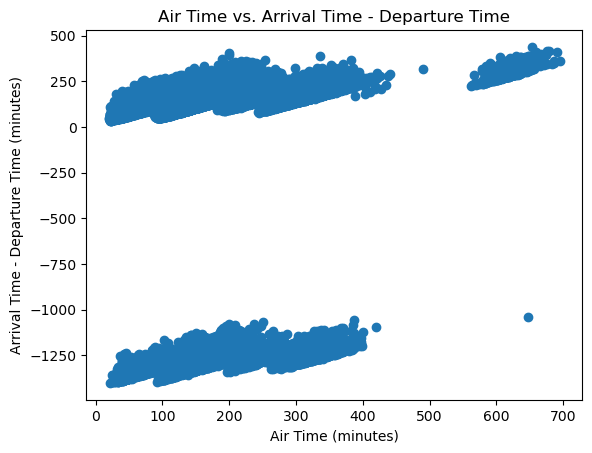

In [46]:
# Solution
import matplotlib.pyplot as plt
plt.scatter(flights['air_time'], flights['arr_time_min'] - flights['dep_time_min'])
plt.xlabel('Air Time (minutes)')
plt.ylabel('Arrival Time - Departure Time (minutes)')
plt.title('Air Time vs. Arrival Time - Departure Time')
plt.show()

11. We expect `air_time` and `arr_time_min` - `dep_time_min` to be the same, but they’re not. Why not?
Identify a major data issue and subtle one.

In [ ]:
# Solution

12. Implement your fix to the major probelm. Remake the plot from the previous question.

In [ ]:
# Solution

13. Find the 10 most delayed flights 

In [ ]:
# Solution

## Summarizing grouped data

14. Calculate average delays by destination for flights originating in NYC. Create a variable which ranks destinations from worst to best, where 1 is the worst rank.

In [ ]:
# Solution

15. Which plane (`tailnum`) has the most minutes of delays total?

In [ ]:
# Solution

16. Which airlines only offer flights from New York to one other airport?

In [ ]:
# Solution

17. Calculate the median arrival delay by airline.

In [ ]:
# Solution

18. ExpressJet has a median arrival delay of -1 minutes while US Airways has a median arrival delay of -6 minutes. Does this tell you that US Airways is a more reliable airline? Why or why not?


In [ ]:
# Solution

19. Median arrival delay may not be the best metric for our needs. Brainstorm at least 4 additional ways to assess the typical delay characteristics of a group of flights.

In [ ]:
# Solution

20. Write a code which calculates your delay measures separately by airline. Do particular airlines perform poorly on multiple metrics?

In [ ]:
# Solution